# Problem Statement
STA hires hundreds of IT executives and managers for their consulting business. STA invest a large amount of time and effort in analyzing each and every resume to calculate the joining CTC/salary for new hires.

## Solution
I created a linear regression model to predict the CTC/Salary of new hires 

The Training Dataset can be found [here](https://docs.google.com/spreadsheets/u/0/d/1bcOXd9dFhgxsmonqC0TtFLQrAKfzxQNL/htmlview) while the Test Dataset can be found [here](https://docs.google.com/spreadsheets/u/0/d/1rsyHvyjVzl8YoIzRgyqNTxJIVUoNhivL/htmlview)


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
# Importing Data Set
train_data = pd.read_excel(r"C:\Users\awx1197093\Desktop\Start-Tech\Data_file.xlsx", index_col="S.No.")
test_data = pd.read_excel(r"C:\Users\awx1197093\Desktop\Start-Tech\Test_data_file.xlsx")

In [3]:
train_data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,,,,
1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [4]:
test_data.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1338
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 94.1+ KB


In [6]:
train_data.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [7]:
train_data.corr()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
Previous CTC,1.000000,0.008282,-0.037170,0.117035,0.270260
Previous job changes,0.008282,1.000000,0.001507,0.034137,0.007518
Graduation marks,-0.037170,0.001507,1.000000,-0.065412,-0.017557
Exp (Months),0.117035,0.034137,-0.065412,1.000000,0.301569
CTC,0.270260,0.007518,-0.017557,0.301569,1.000000


In [8]:
train_data.columns

Index(['College', 'Role', 'City type', 'Previous CTC', 'Previous job changes',
       'Graduation marks', 'Exp (Months)', 'CTC'],
      dtype='object')

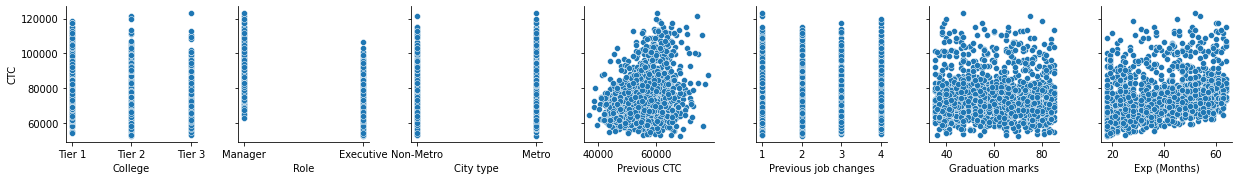

In [9]:
sns.pairplot(x_vars=['College', 'Role', 'City type', 'Previous CTC', 'Previous job changes',
       'Graduation marks', 'Exp (Months)'], y_vars=['CTC'], data=train_data)

In [10]:
cat_train = pd.get_dummies(train_data)

In [11]:
cat_train.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
S.No.,,,,,,,,,,,,
1,55523,3,66,19,71406.576531,1,0,0,0,1,0,1
2,57081,1,84,18,68005.870631,0,1,0,1,0,1,0
3,60347,2,52,28,76764.020277,0,1,0,1,0,1,0
4,49010,2,81,33,82092.386880,0,0,1,1,0,1,0
5,57879,4,74,32,73878.097729,0,0,1,1,0,1,0


In [12]:
cat_train.columns

Index(['Previous CTC', 'Previous job changes', 'Graduation marks',
       'Exp (Months)', 'CTC', 'College_Tier 1', 'College_Tier 2',
       'College_Tier 3', 'Role_Executive', 'Role_Manager', 'City type_Metro',
       'City type_Non-Metro'],
      dtype='object')

In [13]:
next_train = cat_train.drop(['College_Tier 3', 'Role_Executive','City type_Non-Metro'], axis=1)

In [14]:
next_train.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro
S.No.,,,,,,,,,
1,55523,3,66,19,71406.576531,1,0,1,0
2,57081,1,84,18,68005.870631,0,1,0,1
3,60347,2,52,28,76764.020277,0,1,0,1
4,49010,2,81,33,82092.386880,0,0,0,1
5,57879,4,74,32,73878.097729,0,0,0,1


In [15]:
test_data.columns

Index(['College', 'Role', 'City type', 'College_T1', 'College_T2',
       'Role_Manager', 'City_Metro', 'previous CTC', 'previous job changes',
       'Graduation marks', 'Exp', 'Actual CTC'],
      dtype='object')

In [16]:
next_train.columns

Index(['Previous CTC', 'Previous job changes', 'Graduation marks',
       'Exp (Months)', 'CTC', 'College_Tier 1', 'College_Tier 2',
       'Role_Manager', 'City type_Metro'],
      dtype='object')

In [17]:
next_train = next_train.rename(columns={
       'Exp (Months)':'Exp', 'CTC':'Actual CTC', 'College_Tier 1':'College_T1', 'College_Tier 2':'College_T2',
       'City type_Metro':'City_Metro','Previous CTC':'previous CTC','Previous job changes': 'previous job changes'})

In [18]:
next_train.head()

,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,College_T1,College_T2,Role_Manager,City_Metro
S.No.,,,,,,,,,
1,55523,3,66,19,71406.576531,1,0,1,0
2,57081,1,84,18,68005.870631,0,1,0,1
3,60347,2,52,28,76764.020277,0,1,0,1
4,49010,2,81,33,82092.386880,0,0,0,1
5,57879,4,74,32,73878.097729,0,0,0,1


In [19]:
test_data = test_data.drop(['College', 'Role', 'City type'], axis=1)

In [20]:
test_data.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,1,0,1,0,55523,3,66,19,71406.576531
1,0,1,0,1,57081,1,84,18,68005.870631
2,0,1,0,1,60347,2,52,28,76764.020277
3,0,0,0,1,49010,2,81,33,82092.386880
4,0,0,0,1,57879,4,74,32,73878.097729


In [21]:
next_train.columns

Index(['previous CTC', 'previous job changes', 'Graduation marks', 'Exp',
       'Actual CTC', 'College_T1', 'College_T2', 'Role_Manager', 'City_Metro'],
      dtype='object')

In [22]:
test_data = test_data[['previous CTC', 'previous job changes', 'Graduation marks', 'Exp',
       'Actual CTC', 'College_T1', 'College_T2', 'Role_Manager', 'City_Metro']]

In [23]:
test_data_y = test_data[["Actual CTC"]]
test_data_X = test_data.drop(["Actual CTC"], axis =1)

In [24]:
next_train_y = next_train[["Actual CTC"]] 
next_train_X = next_train.drop(["Actual CTC"], axis =1)

In [25]:
test_data_X.head()

,previous CTC,previous job changes,Graduation marks,Exp,College_T1,College_T2,Role_Manager,City_Metro
0,55523,3,66,19,1,0,1,0
1,57081,1,84,18,0,1,0,1
2,60347,2,52,28,0,1,0,1
3,49010,2,81,33,0,0,0,1
4,57879,4,74,32,0,0,0,1


In [26]:
next_train_X.reset_index(drop=True, inplace=True)

In [27]:
next_train_X.head()

,previous CTC,previous job changes,Graduation marks,Exp,College_T1,College_T2,Role_Manager,City_Metro
0,55523,3,66,19,1,0,1,0
1,57081,1,84,18,0,1,0,1
2,60347,2,52,28,0,1,0,1
3,49010,2,81,33,0,0,0,1
4,57879,4,74,32,0,0,0,1


In [28]:
model = LinearRegression()

In [29]:
model.fit(next_train_X, next_train_y)

LinearRegression()

In [30]:
prediction = model.predict(test_data_X)

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(test_data_y, prediction)

0.6081873160506195

C:\Users\awx1197093\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Actual CTC'>

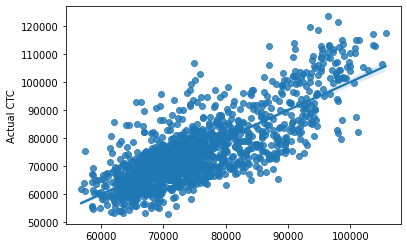

In [33]:
sns.regplot(prediction, test_data_y)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
mean_absolute_error(test_data_y, prediction)

6159.175547850429

In [39]:
mean_squared_error(test_data_y, prediction)

61677937.04530962